## Predicting house prices using Linear Regression and Decision Tree models

In [1]:
# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load the Dataset

In [4]:
housedf = pd.read_csv ("Housing.csv")

In [20]:
# Load the first five rows of the dataset
housedf.head (5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [21]:
# Encode categorical variables

In [22]:
label_encoder = {}
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
        le = LabelEncoder()
        housedf[col] = le.fit_transform(housedf[col])
        label_encoder[col] = le

In [23]:
# Feature selection and the target variable

In [24]:
X = housedf[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = housedf['price']  #The target variable

In [26]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [10]:
#Spliting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

In [12]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
#Make Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)


In [15]:
# Evaluate both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [16]:
# Print evaluation metrics for Linear Regression
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("R-Squared (R2):", r2_linear)

Linear Regression Performance:
Mean Squared Error (MSE): 1771751116594.0344
Root Mean Squared Error (RMSE): 1331071.4167895103
R-Squared (R2): 0.6494754192267804


In [17]:
# Print evaluation metrics for Decision Tree Regression
print("\nDecision Tree Regression Performance:")
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R-Squared (R2):", r2_tree)



Decision Tree Regression Performance:
Mean Squared Error (MSE): 2688177649082.569
Root Mean Squared Error (RMSE): 1639566.2990811225
R-Squared (R2): 0.4681689010023007


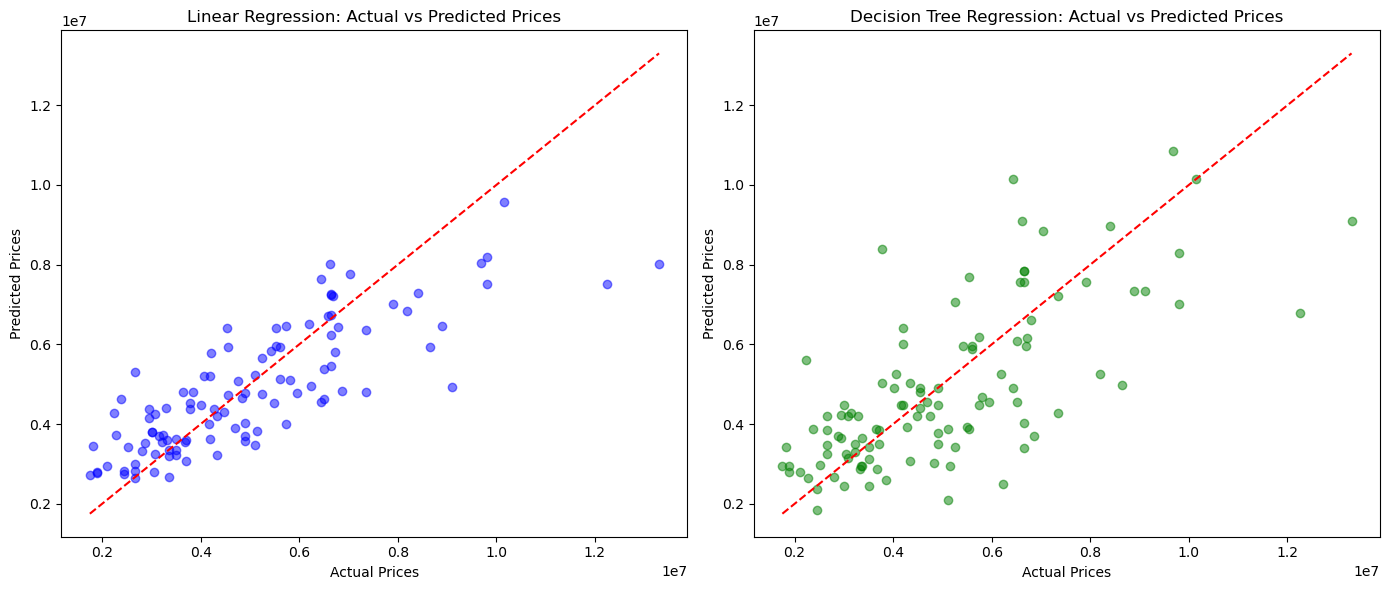

In [18]:
# Visualize actual vs predicted prices for both models
plt.figure(figsize=(14, 6))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Subplot for Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Decision Tree Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()


In [19]:
# Print model coefficients for Linear Regression (optional)
print("\nLinear Regression Model Coefficients:", linear_model.coef_)
print("Linear Regression Model Intercept:", linear_model.intercept_)


Linear Regression Model Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Linear Regression Model Intercept: 293083.0691506658


In [19]:
#Save the model

import joblib
joblib.dump(linear_model, "linear_regression.pkl")

['linear_regression.pkl']